<a href="https://colab.research.google.com/github/shaheerzubery/Twitter_data_SentimentAnalysis/blob/main/Tweepy_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis with Tweepy



### Setup Environment import libraries

In [2]:
!pip install tweepy==4.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [3]:
import tweepy
import pandas as pd
import numpy as np
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Twitter authentication

In [4]:
#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAG4bgAEAAAAAHuK0Tl1snlbsArZ5wHbV6yzYU7M%3DZ74ih1bFhhKNjDXstDaOZptxH97ixXOK40A19Ap6pR5T4qoer5')

### Get recent public tweets on a keyword

In [6]:
query = '#Samsung -is:retweet lang:en'
paginator = tweepy.Paginator(
    client.search_recent_tweets,
    query = query,
    max_results = 100,
    limit = 10
)


Tweet_list = []

for tweet in paginator.flatten():
    Tweet_list.append(tweet)
    print(tweet)

@brijendra_a you're the seeker - the one who loves exploring!

Go ahead, find your best angles and flex them with #GalaxyZFlip4, and unfold your world.

#FlexEveryAngle #Samsung https://t.co/Q5Gc9ybTQe
#Samsung Tab S8 Ultra 512gb Wifi
Dm/ Call or Whatsapp
To place order:
0818 382 0891 Uzo
0818 382 0897 Sammy
0818 382 0026 Amarachi (Abuja store)
08188880047 Favour (Lekki Store) https://t.co/33WskiAqpN
#New #firmware #Samsung Galaxy Note10 Lite #SM_N770F #ECO | pda: #N770FXXU8GVG4 https://t.co/2ENU3ASb1V
#New #firmware #Samsung Galaxy Note10 Lite #SM_N770F #GLB | pda: #N770FXXU8GVG4 https://t.co/nu6U06ReN2
#New #firmware #Samsung Galaxy Note10 Lite #SM_N770F #ECO | pda: #N770FXXU8GVG4 https://t.co/8kF2AgaB6B
#New #firmware #Samsung Galaxy Note10 Lite #SM_N770F #GLB | pda: #N770FXXU8GVG4 https://t.co/ILYI8DdqDw
#New #firmware #Samsung Galaxy Note10 Lite #SM_N770F #ECO | pda: #N770FXXU8GVG4 https://t.co/aD5KidpAon
#New #firmware #Samsung Galaxy Note10 Lite #SM_N770F #GLB | pda: #N770FXXU8G

In [9]:
tweet_list_df = pd.DataFrame(Tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(10)

,text
0,@brijendra_a you're the seeker - the one who l...
1,#Samsung Tab S8 Ultra 512gb Wifi\nDm/ Call or ...
2,#New #firmware #Samsung Galaxy Note10 Lite #SM...
3,#New #firmware #Samsung Galaxy Note10 Lite #SM...
4,#New #firmware #Samsung Galaxy Note10 Lite #SM...
5,#New #firmware #Samsung Galaxy Note10 Lite #SM...
6,#New #firmware #Samsung Galaxy Note10 Lite #SM...
7,#New #firmware #Samsung Galaxy Note10 Lite #SM...
8,#New #firmware #Samsung Galaxy Note10 Lite #SM...
9,#New #firmware #Samsung Galaxy Note10 Lite #SM...


### Data Preprocessing
In this we are removing special chars and caps and extra details

In [10]:
def preprocess_tweet(sen):
    sentence = sen.lower()

    # now we use re library to remove extra un-usefull  details

     # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove punctuations and numbers
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [11]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
    cleaned = preprocess_tweet(tweet)
    cleaned_tweets.append(cleaned)

In [12]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(10)

,text,cleaned
0,@brijendra_a you're the seeker - the one who l...,you re the seeker the one who loves exploring...
1,#Samsung Tab S8 Ultra 512gb Wifi\nDm/ Call or ...,samsung tab s8 ultra 512gb wifi dm call or wh...
2,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...
3,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...
4,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...
5,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...
6,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...
7,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...
8,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...
9,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...


### Generate Sementic labels


In [16]:
tweet_list_df[['Polarity', 'Subjective']] = tweet_list_df['cleaned'].apply(lambda Text : pd.Series(TextBlob(Text).sentiment))

for index,row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']

    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = 'negative'
    elif comp >= 0.05:
        tweet_list_df.loc[index,'sentiment'] = 'positive'
    else:
        tweet_list_df.loc[index, 'sentiment'] = 'neutral'
    
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

tweet_list_df.head(10)


,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,Polarity,Subjective
0,@brijendra_a you're the seeker - the one who l...,you re the seeker the one who loves exploring...,1.000000,0.300000,positive,0.0,0.752,0.248,0.8360,1.000000,0.300000
1,#Samsung Tab S8 Ultra 512gb Wifi\nDm/ Call or ...,samsung tab s8 ultra 512gb wifi dm call or wh...,0.000000,0.000000,positive,0.0,0.912,0.088,0.4404,0.000000,0.000000
2,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545
3,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545
4,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545
5,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545
6,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545
7,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545
8,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545
9,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545


### Sentiment Visualisation

In [20]:
tweet_list_df_negative = tweet_list_df[tweet_list_df['sentiment']=='negative']
tweet_list_df_positive = tweet_list_df[tweet_list_df['sentiment']=='positive']
tweet_list_df_neutral = tweet_list_df[tweet_list_df['sentiment']=='neutral']


In [21]:
def count_value(data,feature):
    total = data.loc[:,feature].value_counts(dropna = False)
    percentage = round(data.loc[:,feature].value_counts(dropna = False ,normalize = True)* 100,2)
    return pd.concat([total,percentage], axis =1 , keys= ['Total', 'Percentage'])

In [22]:
count_value(tweet_list_df,'sentiment')

,Total,Percentage
positive,881,88.1
neutral,91,9.1
negative,28,2.8


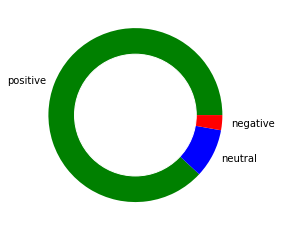

In [24]:
# create data for Pie Chart
pichart = count_value(tweet_list_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Word Cloud

In [25]:
def create_wordcloud(text):
    mask = np.array(Image.open("/content/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("c1_wordcloud.png")
    print("Word Cloud Saved Successfully")
    path="c1_wordcloud.png"
    display(Image.open(path))

Word Cloud Saved Successfully


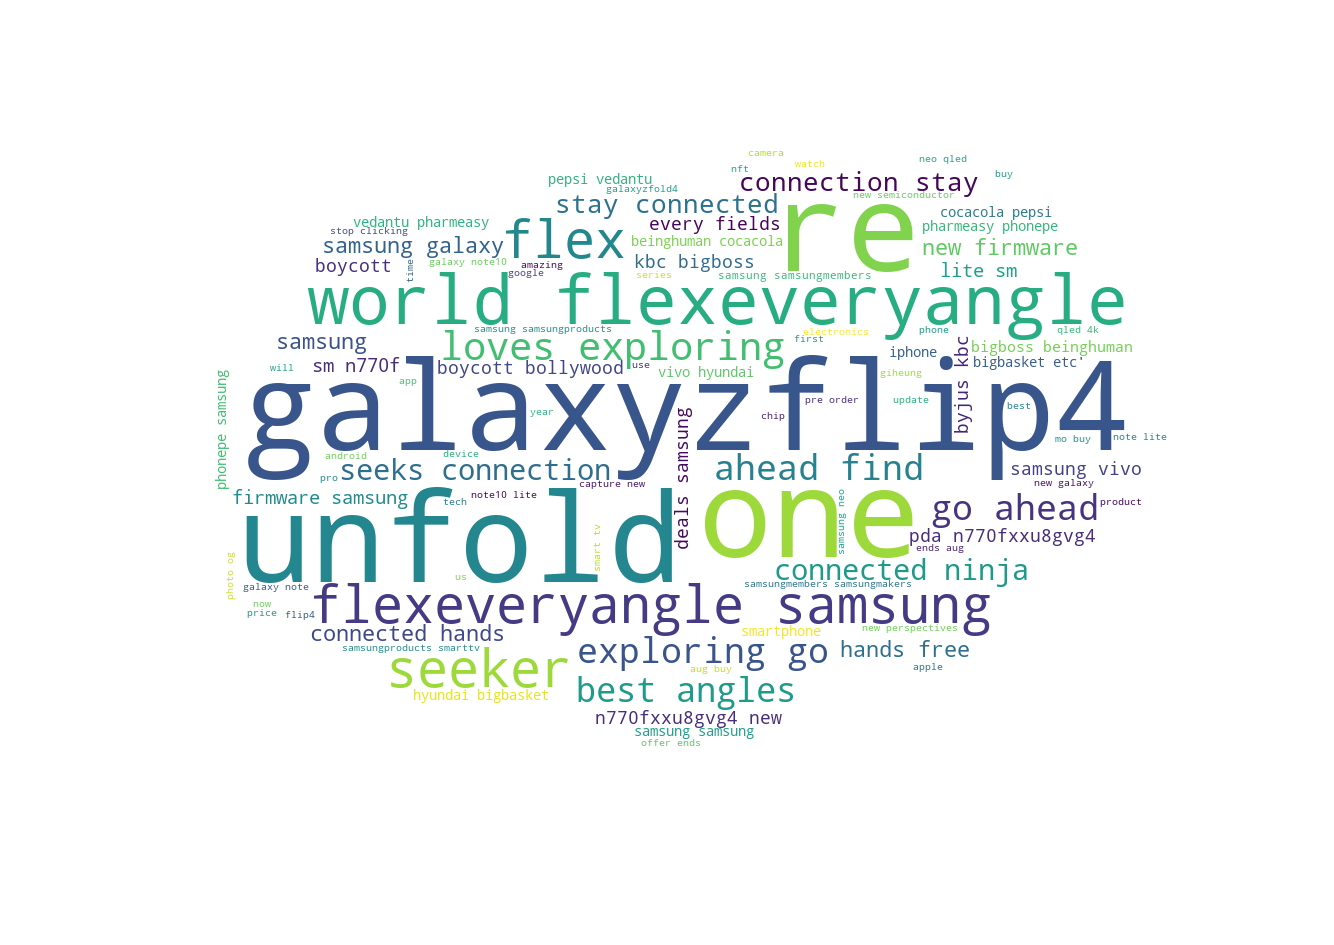

In [26]:
create_wordcloud(tweet_list_df['cleaned'].values)

### Text Insights

In [27]:
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [28]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,169.07
neutral,116.63
positive,155.31


In [29]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,27.89
neutral,17.70
positive,24.97


### Saving the output

In [30]:
tweet_list_df.to_csv('./sentimentanalysis_output_TEXTBLOB.csv', sep=',', encoding='UTF-8')
tweet_list_df.head(10)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,Polarity,Subjective,text_len,text_word_count
0,@brijendra_a you're the seeker - the one who l...,you re the seeker the one who loves exploring...,1.000000,0.300000,positive,0.0,0.752,0.248,0.8360,1.000000,0.300000,155,26
1,#Samsung Tab S8 Ultra 512gb Wifi\nDm/ Call or ...,samsung tab s8 ultra 512gb wifi dm call or wh...,0.000000,0.000000,positive,0.0,0.912,0.088,0.4404,0.000000,0.000000,172,31
2,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545,72,11
3,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545,72,11
4,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545,72,11
5,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545,72,11
6,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545,72,11
7,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545,72,11
8,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545,72,11
9,#New #firmware #Samsung Galaxy Note10 Lite #SM...,new firmware samsung galaxy note10 lite sm n7...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,0.136364,0.454545,72,11
